# Distribution of the model quality of the scop_cl_equal_globular100_identity95_coverage60 dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 100
sns.set(style='darkgrid')
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
from pathlib import Path
score_dir = Path('../../../../score/scop_cl_equal_globular100_identity95_coverage60')
plot_dir = score_dir / 'plot'
plot_dir.mkdir(exist_ok=True)
df_path = score_dir / 'scop_cl_equal_globular100_identity95_coverage60_final.csv'
df = pd.read_csv(df_path, index_col=0).reset_index(drop=True)
df

model  GDT_TS  GDT_HA  TMscore  target  template  seq_len  \
0      1AYZ_A_3OJ4_A_2_1   0.864   0.704    0.912  1AYZ_A  3OJ4_A_2      153   
1      1AYZ_A_4L83_A_3_3   0.858   0.678    0.907  1AYZ_A  4L83_A_3      153   
2      1AYZ_A_6TTU_D_1_5   0.851   0.678    0.898  1AYZ_A  6TTU_D_1      153   
3      1AYZ_A_4GPR_A_1_1   0.842   0.688    0.872  1AYZ_A  4GPR_A_1      153   
4      1AYZ_A_1TTE_A_3_5   0.657   0.423    0.787  1AYZ_A  1TTE_A_3      153   
...                  ...     ...     ...      ...     ...       ...      ...   
14620  6SPF_T_3PYO_T_2_1   0.862   0.707    0.853  6SPF_T  3PYO_T_2       94   
14621  6SPF_T_3J7Y_U_3_1   0.614   0.444    0.598  6SPF_T  3J7Y_U_3       94   
14622  6SPF_T_1PNU_R_2_4   0.790   0.590    0.775  6SPF_T  1PNU_R_2       94   
14623  6SPF_T_5O60_U_3_4   0.832   0.692    0.840  6SPF_T  5O60_U_3       94   
14624  6SPF_T_4BTD_X_2_1   0.891   0.750    0.891  6SPF_T  4BTD_X_2       94   

       identity  positive  coverage  ...  SF-PDBID  SF-PDBREG  SF-UNIID  \
0            55        89       145  ...      1AYZ    A:2-154    P06104   
1            50        82       150  ...      1AYZ    A:2-154    P06104   
2            56        90       143  ...      1AYZ    A:2-154    P06104   
3            55        89       139  ...      1AYZ    A:2-154    P06104   
4            44        79       149  ...      1AYZ    A:2-154    P06104   
...         ...       ...       ...  ...       ...        ...       ...   
14620        42        56        88  ...      6SPF     T:1-94    E2RXT1   
14621        27        46        92  ...      6SPF     T:1-94    E2RXT1   
14622        37        54        87  ...      6SPF     T:1-94    E2RXT1   
14623        36        49        87  ...      6SPF     T:1-94    E2RXT1   
14624        42        56        88  ...      6SPF     T:1-94    E2RXT1   

       SF-UNIREG TP       CL       CF       SF       FA         Class  
0          2-154  1  1000003  2000386  3000570  4001046  alpha + beta  
1          2-154  1  1000003  2000386  3000570  4001046  alpha + beta  
2          2-154  1  1000003  2000386  3000570  4001046  alpha + beta  
3          2-154  1  1000003  2000386  3000570  4001046  alpha + beta  
4          2-154  1  1000003  2000386  3000570  4001046  alpha + beta  
...          ... ..      ...      ...      ...      ...           ...  
14620       1-94  1  1000003  2000195  3000210  4000943  alpha + beta  
14621       1-94  1  1000003  2000195  3000210  4000943  alpha + beta  
14622       1-94  1  1000003  2000195  3000210  4000943  alpha + beta  
14623       1-94  1  1000003  2000195  3000210  4000943  alpha + beta  
14624       1-94  1  1000003  2000195  3000210  4000943  alpha + beta  

[14625 rows x 37 columns]

In [3]:
len(df['target'].unique())

100

In [4]:
# Targets with less model than 150
df.groupby('target').filter(lambda x: len(x) < 150).value_counts('target')

target
1KA9_F    145
1I0D_A    131
1W8O_A    122
1QNI_A    120
2VKE_A    114
1VLK_A     95
2MR9_A     90
4EQF_A     81
1HV5_A     77
dtype: int64

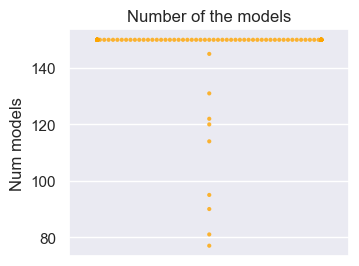

In [5]:
# Distribution of the number of the models for each target
data = df.groupby('target').agg({'model':len}).rename({'model': 'Num models'}, axis=1)
# Distribution of the sequence length
plt.figure(figsize=(4, 3))
# plt.ylim([50, 155])
plt.subplots_adjust(left=0.2)
y = 'Num models'
sns.swarmplot(data=data, y=y, color='orange', alpha=0.8, s=3)
plt.title('Number of the models')
plt.show()

In [6]:
# Identify targets with low model quality
df.groupby('target').filter(lambda x: x['GDT_TS'].max() < 0.7).value_counts('target')

Series([], dtype: int64)

## Sequence length

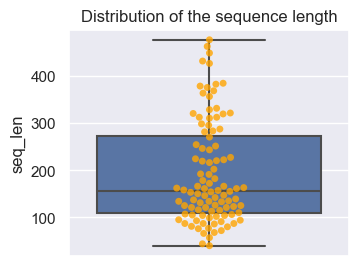

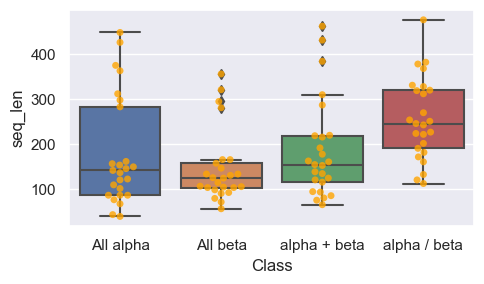

In [7]:
# Distribution of the sequence length
plt.figure(figsize=(4, 3))
plt.subplots_adjust(left=0.2)
target_head_df = df.groupby('target').head(1)
sns.boxplot(data=target_head_df, y='seq_len')
sns.swarmplot(data=target_head_df, y='seq_len', color='orange', alpha=0.8)
plt.title('Distribution of the sequence length')
output_path = plot_dir / 'target_sequence_length_swarmplot.png'
plt.savefig(output_path)
plt.show()
plt.figure(figsize=(5, 3))
x = 'Class'
order = np.sort(df[x].unique())
sns.boxplot(data=target_head_df, x=x, y='seq_len', order=order)
sns.swarmplot(data=target_head_df, x=x, y='seq_len', color='orange', order=order, alpha=0.8)
output_path = plot_dir / 'target_sequence_length_domain_num_swarmplot.png'
plt.tight_layout()
plt.savefig(output_path)
plt.show()

In [8]:
df.groupby('target').head(1).value_counts('Class')

Class
All alpha       25
All beta        25
alpha + beta    25
alpha / beta    25
dtype: int64

## Plot GDT_TS

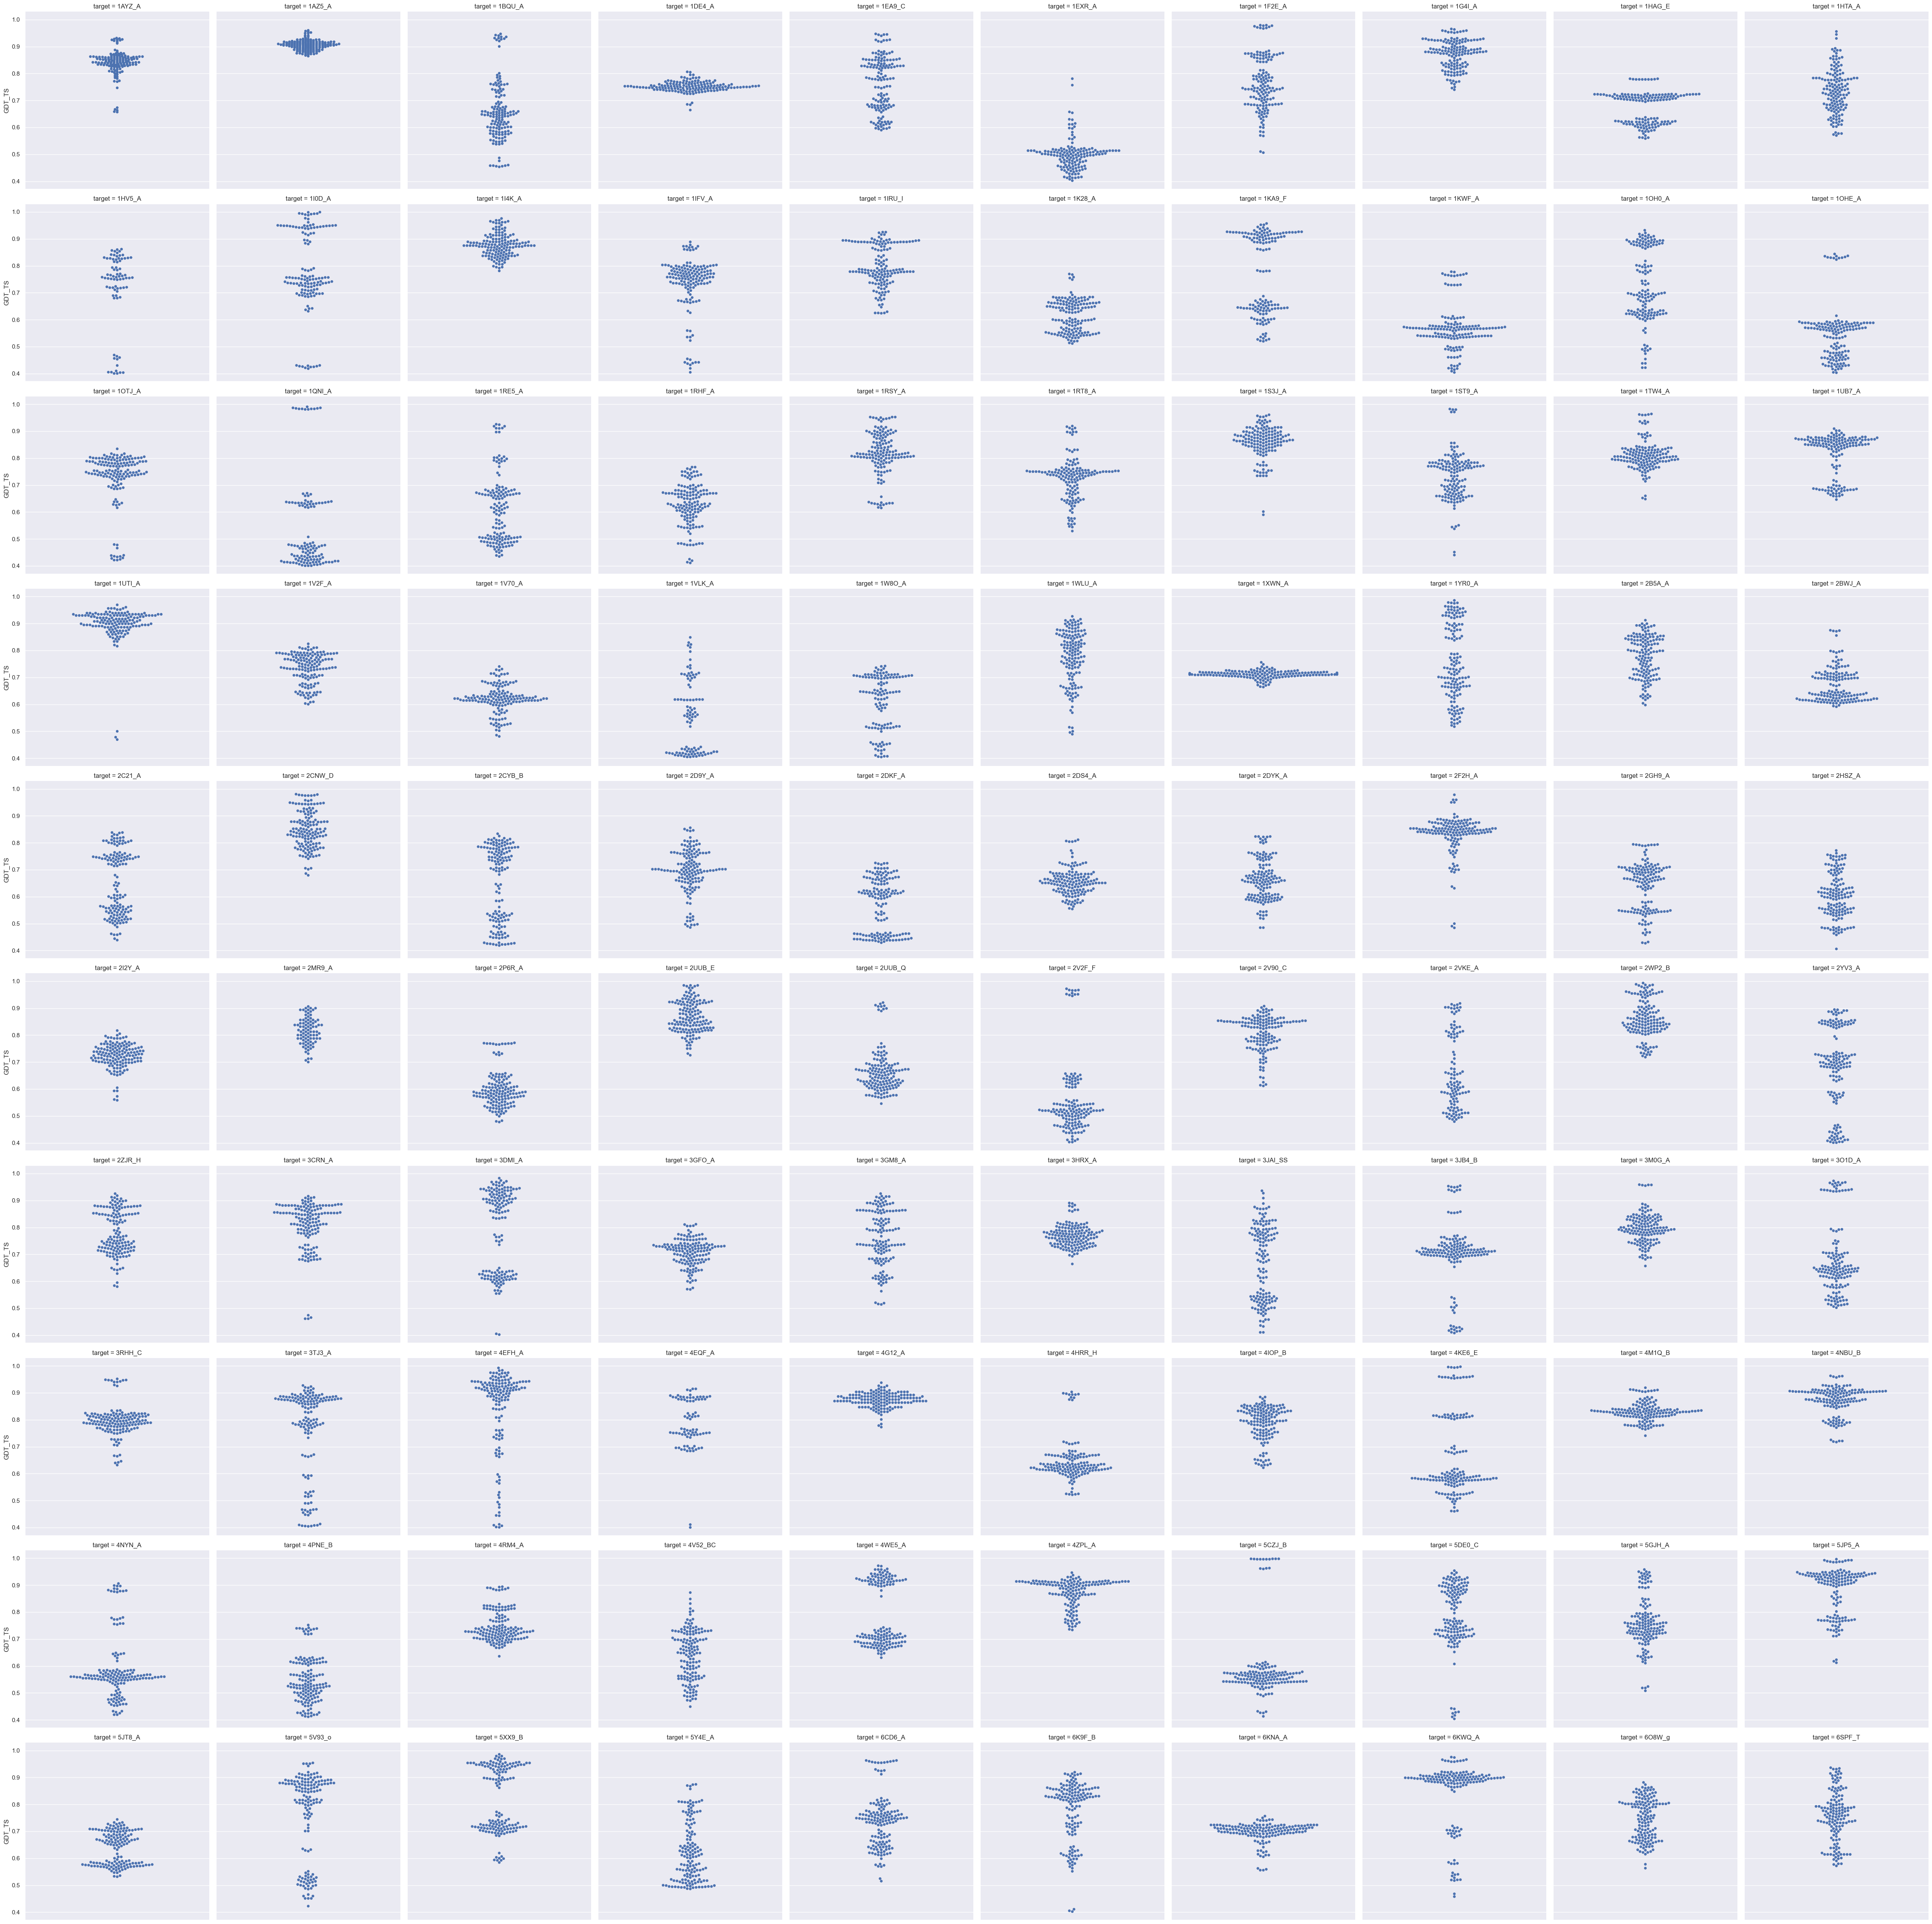

In [9]:
# swarm plot of gdtts
sns.factorplot(data=df, y='GDT_TS', col='target', kind='swarm', col_wrap=10)
output_path = plot_dir / 'gdtts_swarmplot_col10.png'
plt.savefig(output_path)

## An example of distribution

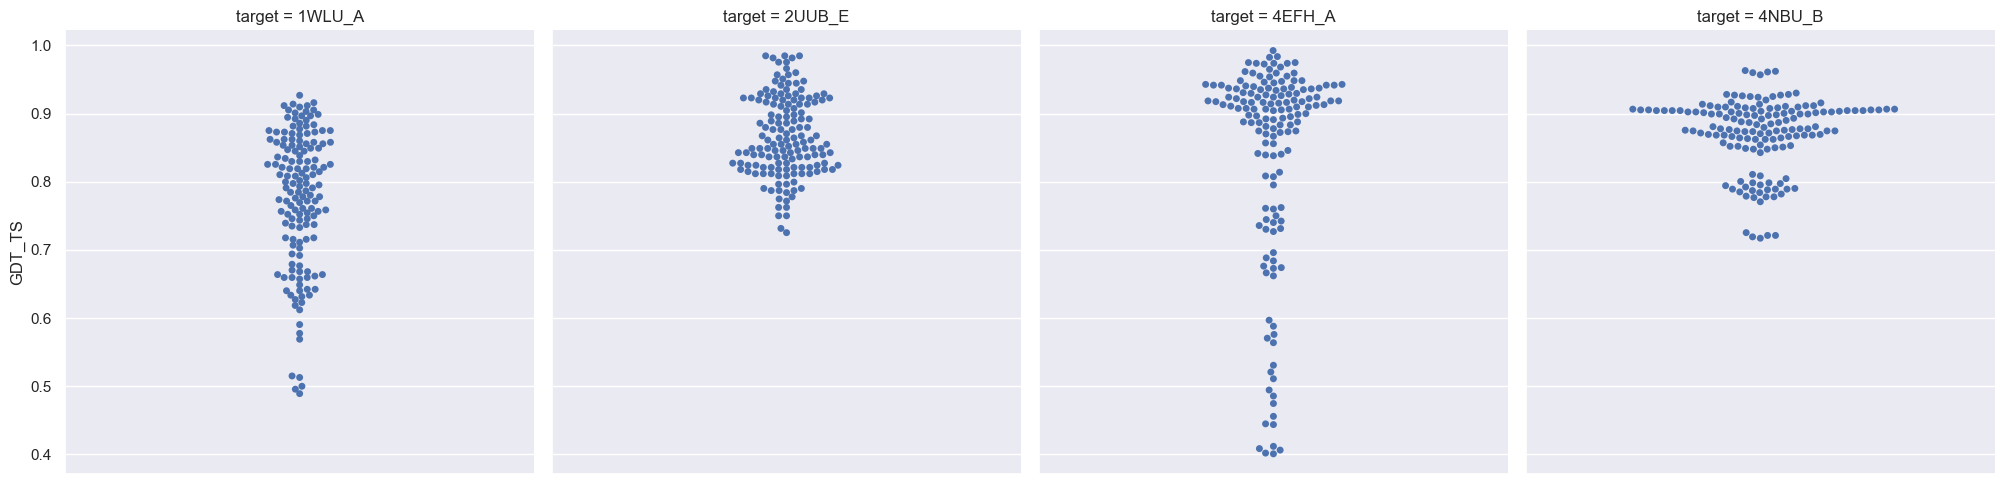

In [10]:
# Good Example
good_target = ['1WLU_A', '2UUB_E', '4EFH_A', '4NBU_B']
target = good_target
data = df.query('target in @target')
sns.factorplot(data=data, y='GDT_TS', col='target', kind='swarm', col_wrap=4, col_order=target)
plt.show()

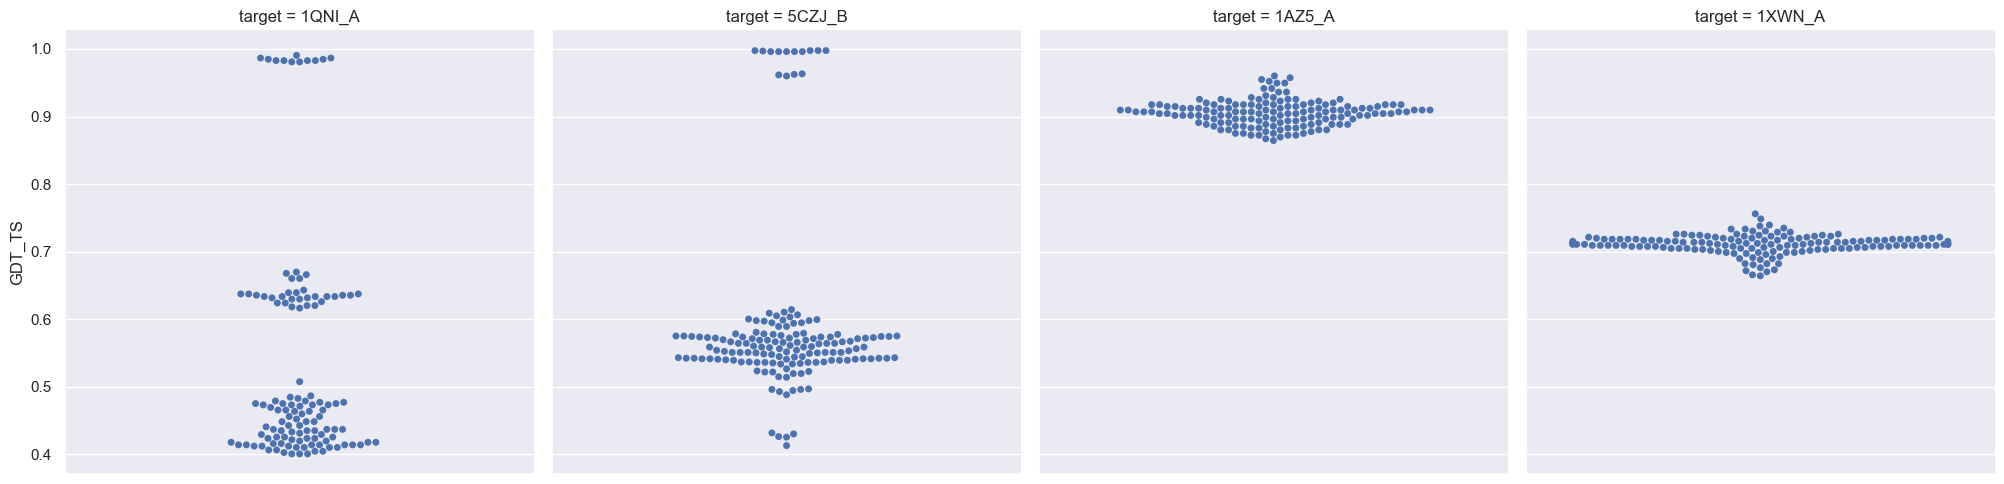

In [11]:
# Bad Example
bad_target = ['1QNI_A', '5CZJ_B', '1AZ5_A', '1XWN_A']
target = bad_target
data = df.query('target in @target')
sns.factorplot(data=data, y='GDT_TS', col='target', kind='swarm', col_wrap=4, col_order=target)
plt.show()

## Compact Swarmplot for each target

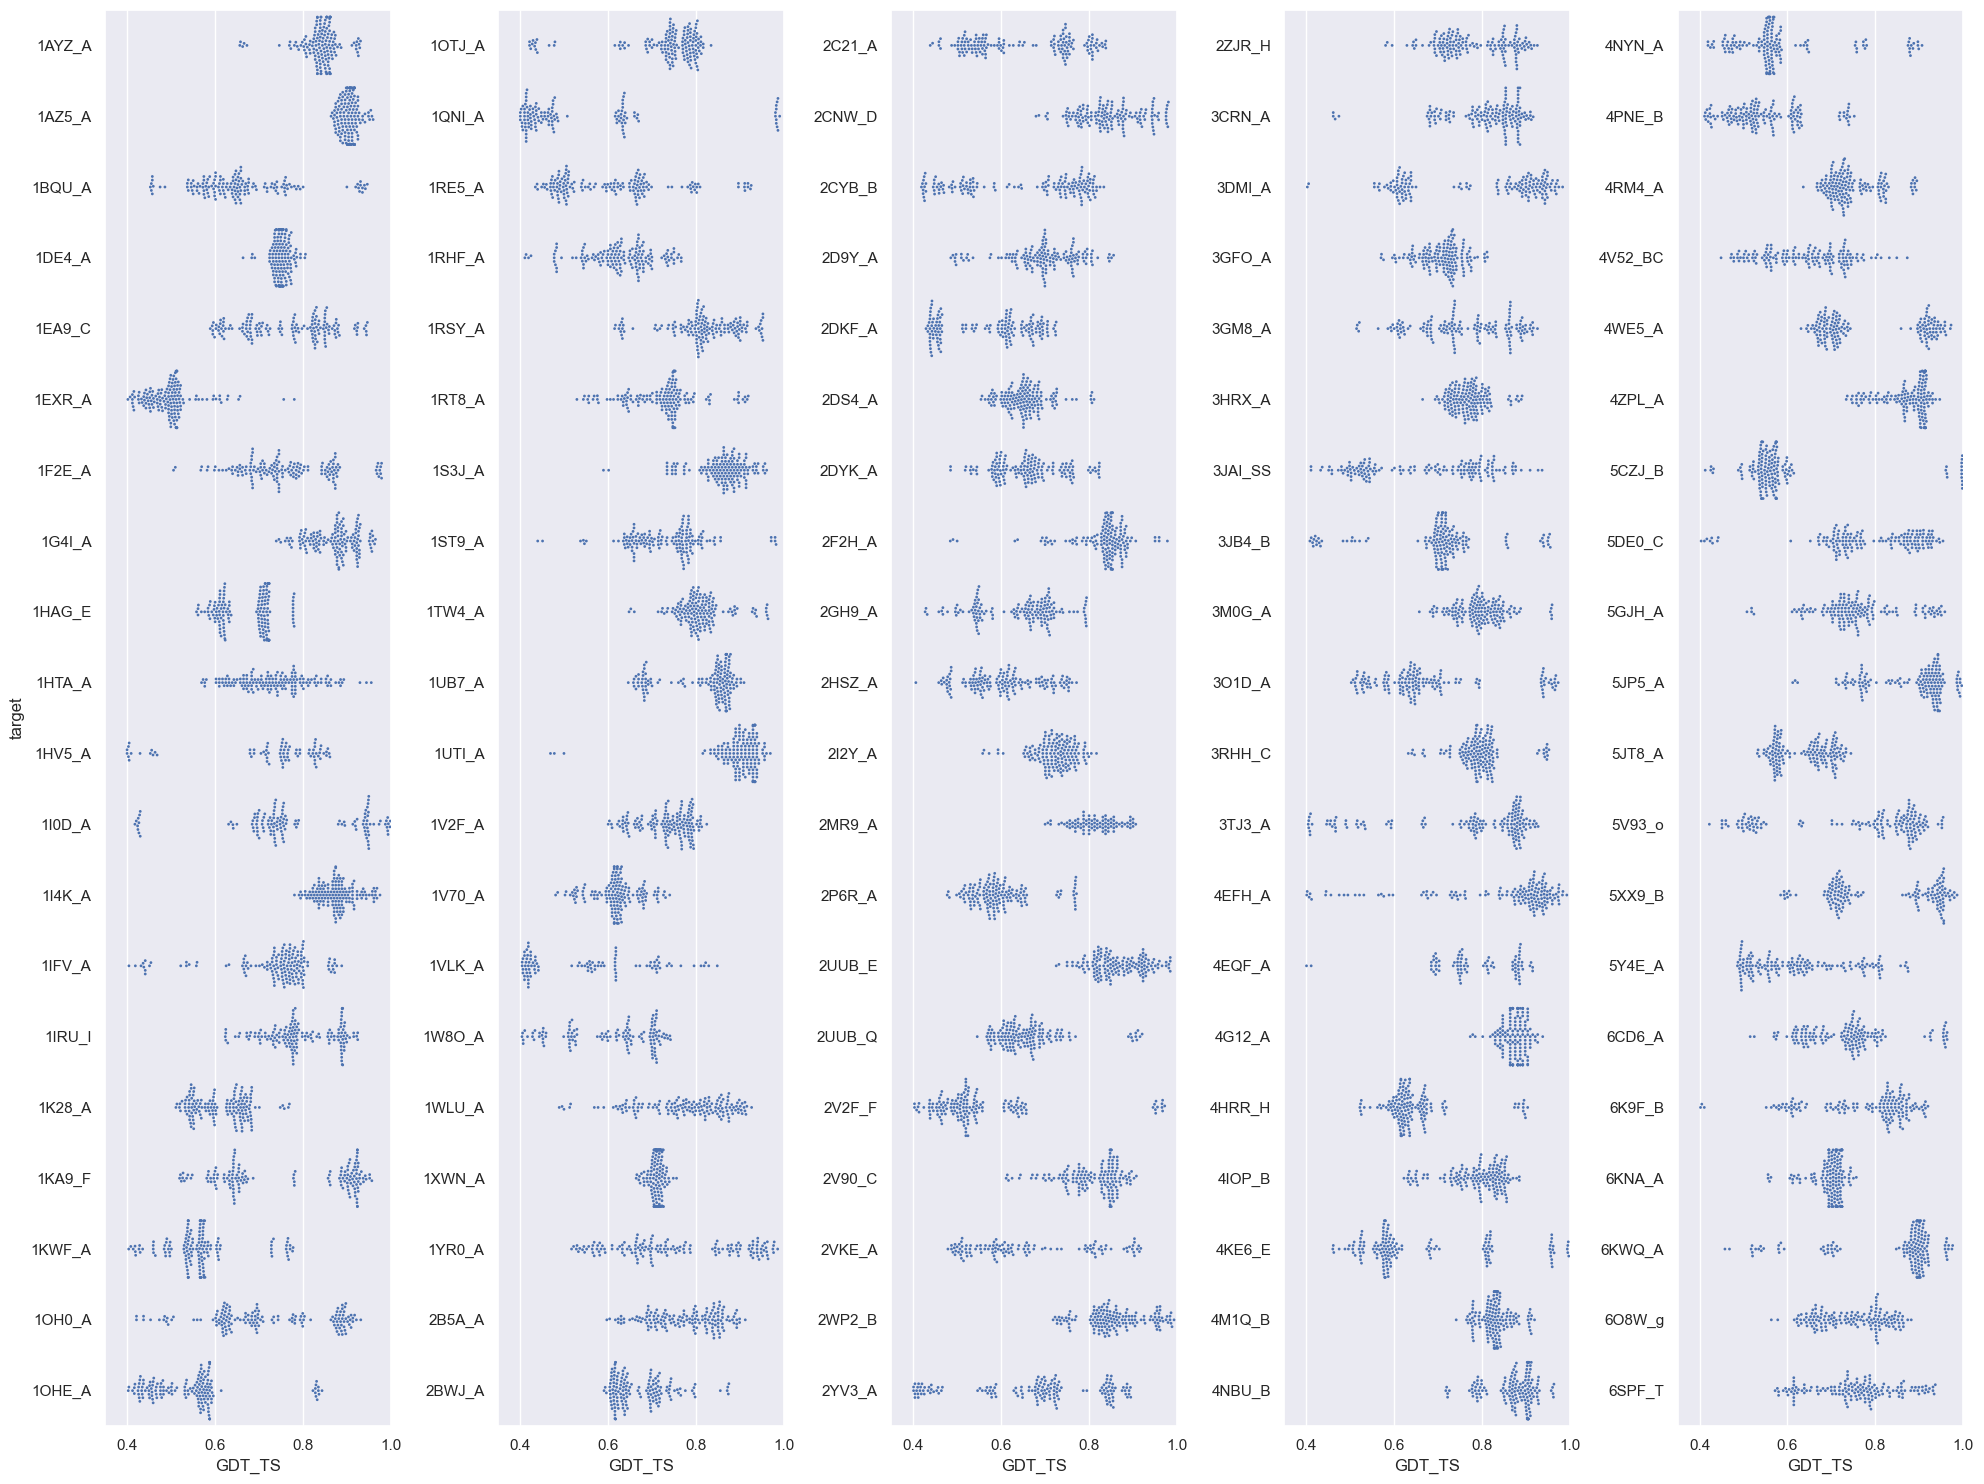

In [12]:
num_split = 5
figsize = (20, 15)
data=df
x='GDT_TS'
y='target'
hue=None
# sort target list you like
target_list = data['target'].sort_values().unique()
target_num = len(target_list)
fig, axes = plt.subplots(nrows=1, ncols=num_split, sharex=False, sharey=False, figsize=figsize)
for i in range(num_split):
    sub_target_list = target_list[i * (target_num // num_split): (i + 1) * (target_num // num_split)]
    sub_data = data.query('target in @sub_target_list')
    sns.swarmplot(data=sub_data, x=x, y=y, orient='h', hue=hue, dodge=False, ax=axes[i], size=2, color='#4c72b0')#, palette='hls')
    axes[i].set_xlim([0.35, 1])
    if i != 0:
        axes[i].set_ylabel('')
plt.tight_layout()
output_path = plot_dir / 'gdtts_swarmplot_horizontal.png'
plt.savefig(output_path)

## Swarmplot for each class

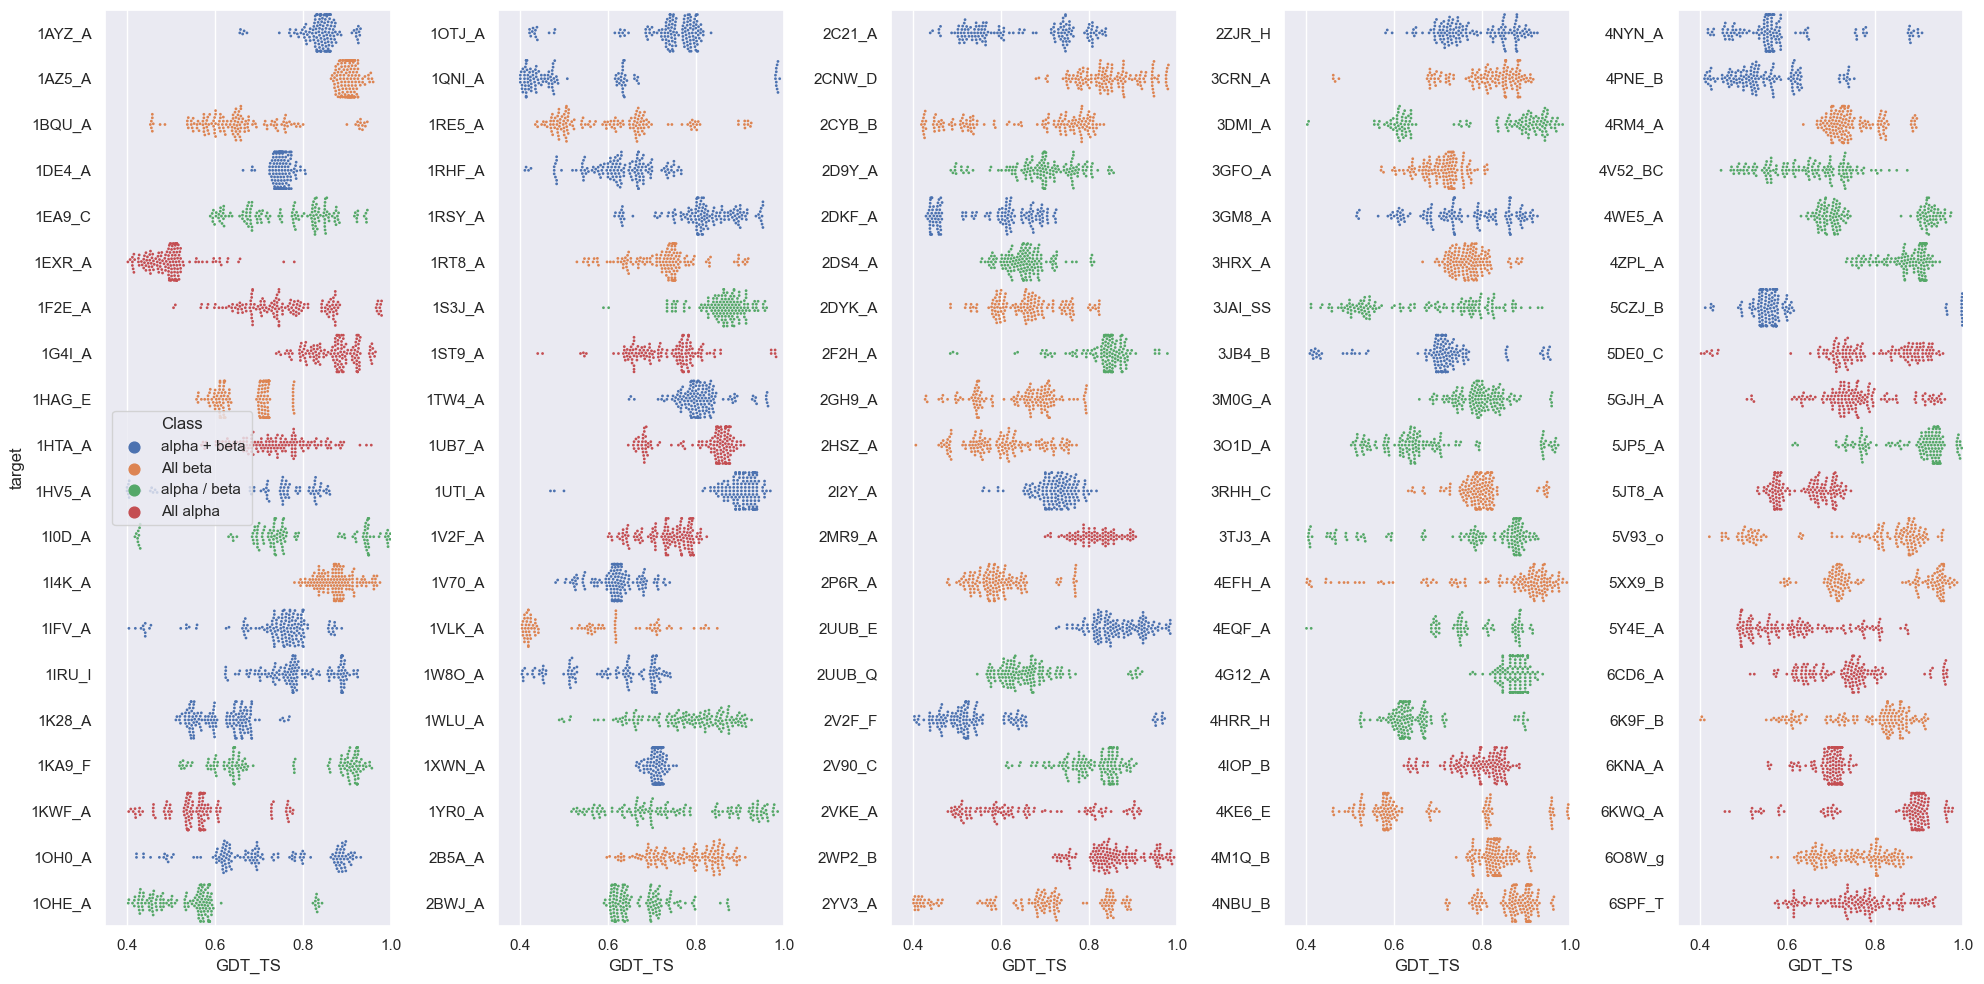

In [13]:
num_split = 5
figsize = (20, 10)
data=df
x='GDT_TS'
y='target'
hue='Class'
# sort target list you like
target_list = data['target'].sort_values().unique()
target_num = len(target_list)
fig, axes = plt.subplots(nrows=1, ncols=num_split, sharex=False, sharey=False, figsize=figsize)
for i in range(num_split):
    sub_target_list = target_list[i * (target_num // num_split): (i + 1) * (target_num // num_split)]
    sub_data = data.query('target in @sub_target_list')
    sns.swarmplot(data=sub_data, x=x, y=y, orient='h', hue=hue, dodge=False, ax=axes[i], size=2)
    axes[i].set_xlim([0.35, 1])
    if i != 0:
        axes[i].set_ylabel('')
    # if i != 1:
        axes[i].get_legend().remove()
plt.tight_layout()
output_path = plot_dir / 'gdtts_swarmplot_horizontal_hue_domain_num.png'
plt.savefig(output_path)

## plot the distribution of the max GDT_TS of each target

In [14]:
max_gdtts_df = df.groupby('target').apply(lambda x: x.loc[x['GDT_TS'].idxmax()])
max_gdtts_df.sort_values('GDT_TS')

model  GDT_TS  GDT_HA  TMscore  target  template  seq_len  \
target                                                                          
2DKF_A  2DKF_A_6V4X_H_2_1   0.725   0.506    0.902  2DKF_A  6V4X_H_2      431   
1V70_A  1V70_A_2GU9_A_3_2   0.741   0.543    0.745  1V70_A  2GU9_A_3      105   
1W8O_A  1W8O_A_6MRV_A_3_1   0.742   0.538    0.871  1W8O_A  6MRV_A_3      356   
5JT8_A  5JT8_A_6JD8_A_2_5   0.744   0.536    0.886  5JT8_A  6JD8_A_2      310   
4PNE_B  4PNE_B_6UV6_A_3_4   0.752   0.567    0.864  4PNE_B  6UV6_A_3      270   
...                   ...     ...     ...      ...     ...       ...      ...   
2WP2_B  2WP2_B_6WW8_A_2_2   0.993   0.957    0.983  2WP2_B  6WW8_A_2      110   
5JP5_A  5JP5_A_3WV6_A_2_1   0.996   0.944    0.986  5JP5_A  3WV6_A_2      134   
4KE6_E  4KE6_E_5XKS_A_1_2   0.997   0.925    0.993  4KE6_E  5XKS_A_1      246   
5CZJ_B  5CZJ_B_4MPQ_A_1_5   0.998   0.975    0.996  5CZJ_B  4MPQ_A_1      319   
1I0D_A  1I0D_A_6GBL_A_3_3   0.999   0.988    0.998  1I0D_A  6GBL_A_3      331   

        identity  positive  coverage  ...  SF-PDBID  SF-PDBREG  SF-UNIID  \
target                                ...                                  
2DKF_A       121       212       419  ...      2DKF    A:1-431    Q5SLP1   
1V70_A        17        31        88  ...      1V70    A:1-105    Q5SM39   
1W8O_A       107       154       346  ...      1W8O   A:47-402    Q02834   
5JT8_A        93       153       306  ...      5JT8    A:6-315    A1KXI0   
4PNE_B        92       143       263  ...      4PNE   B:13-282    Q9ALM7   
...          ...       ...       ...  ...       ...        ...       ...   
2WP2_B        84        97       109  ...      2WP2   B:27-136    Q91Y44   
5JP5_A        98       106       133  ...      5JP5   A:12-145    P47967   
4KE6_E       163       199       245  ...      4KE6    E:4-249    P82597   
5CZJ_B       290       306       319  ...      5CZJ   B:22-340    Q92WT0   
1I0D_A       308       312       331  ...      1I0D   A:35-365    P0A434   

        SF-UNIREG TP       CL       CF       SF       FA         Class  
target                                                                  
2DKF_A      1-431  1  1000003  2000669  3001057  4000432  alpha + beta  
1V70_A      1-105  1  1000001  2000048  3001825  4003968      All beta  
1W8O_A     47-402  1  1000001  2000982  3001607  4002683      All beta  
5JT8_A     24-333  1  1000003  2001107  3001808  4000859  alpha + beta  
4PNE_B      6-275  1  1000002  2000088  3000118  4003320  alpha / beta  
...           ... ..      ...      ...      ...      ...           ...  
2WP2_B     27-136  1  1000000  2001119  3001843  4000871     All alpha  
5JP5_A     12-145  1  1000001  2000089  3000120  4002674      All beta  
4KE6_E      4-249  1  1000002  2000076  3000102  4001179  alpha / beta  
5CZJ_B      2-320  1  1000002  2000031  3000445  4003216  alpha / beta  
1I0D_A     35-365  1  1000002  2000031  3000428  4003212  alpha / beta  

[100 rows x 37 columns]

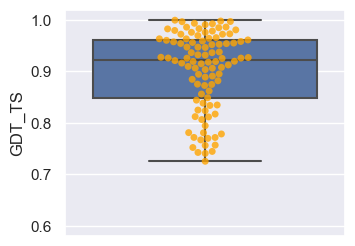

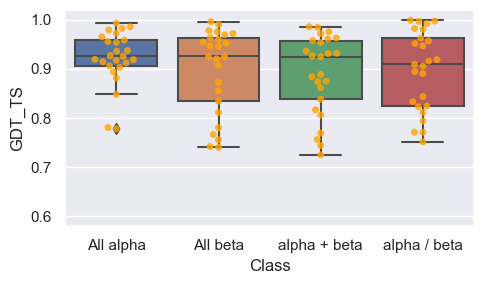

In [15]:
# Distribution of the max GDT_TS
plt.figure(figsize=(4, 3))
plt.subplots_adjust(left=0.2)
y = 'GDT_TS'
plt.ylim([0.58, 1.02])
sns.boxplot(data=max_gdtts_df, y=y)
sns.swarmplot(data=max_gdtts_df, y=y, color='orange', alpha=0.8)
output_path = plot_dir / 'max_gdtts_swarmplot.png'
plt.savefig(output_path)
plt.show()
plt.figure(figsize=(5, 3))
plt.subplots_adjust(left=0.2)
x = 'Class'
plt.ylim([0.58, 1.02])
sns.boxplot(data=max_gdtts_df, x=x, y=y, order=order)
sns.swarmplot(data=max_gdtts_df, x=x, y=y, color='orange', order=order, alpha=0.8)
plt.tight_layout()
output_path = plot_dir / 'max_gdtts_swarmplot_each_domain_num.png'
plt.savefig(output_path)
plt.show()